# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Najwa Tiara Djunaedy Putri
- **Email:** najwatdp@gmail.com
- **ID Dicoding:** najwa_tdp

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Musim apa yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?
- Bagaimana perbandingan jumlah penyewa sepeda antara hari kerja dengan hari libur?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat data penyewaan sepeda yang dihubungkan dengan lingkungan dan kondisi musim, seperti hari libur, hari kerja, cuaca, suhu, kelembaban, dan kecepatan angin

### Assessing Data

Cek apakah ada nilai null dan tipe data yang salah

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek duplikasi

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Cek apakah terdapat definisi parameter statistik yang salah

In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat missing value
- Tidak terdapat duplicate data
- Terdapat kesalahan tipe data pada kolom dteday

### Cleaning Data

Mengubah tipe data kolom dteday menjadi datetime

In [20]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

Mendefinisikan value pada angka yang mewakili value tersebut pada kolom season, yr, dan mnth

In [26]:
day_df["season"] = day_df["season"].apply(lambda value:'springer' if value == 1 else ('summer' if value == 2 else ('fall' if value == 3 else 'winter')))

In [27]:
day_df["yr"] = day_df["yr"].apply(lambda value: 2011 if value == 0 else 2012)

In [28]:
day_df["mnth"] = day_df["mnth"].apply(lambda value: 'January' if value == 1 else ('February' if value == 2 else ('March' if value == 3 else ('April' if value == 4 else ('May' if value == 5 else ('June' if value == 6 else ('July' if value == 7 else ('August' if value == 8 else ('September' if value == 9 else ('October' if value == 10 else ('November' if value == 11 else 'December')))))))))))

In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [30]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jumlah penyewaan sepeda berdasarkan season

In [32]:
day_df.groupby(by='season').cnt.sum().sort_values(ascending=False)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64

Jumlah penyewaan sepeda berdasarkan kelompok temperatur suhu

In [34]:
day_df["temp_group"] = day_df.temp.apply(lambda x: "Cold" if x <= 0.3658 else ("Cool" if x <= 0.4878 else ("Warm" if x <= 0.6097 else "Hot")))
day_df.groupby(by="temp_group").cnt.sum().sort_values(ascending=False)

temp_group
Hot     1362977
Warm     725046
Cold     620177
Cool     584479
Name: cnt, dtype: int64

Jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan atau hari libur

In [36]:
day_df["workingday"] = day_df["workingday"].apply(lambda value: 'working day' if value == 1 else 'weekend or holiday')
day_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
working day           2292410
weekend or holiday    1000269
Name: cnt, dtype: int64

Jumlah penyewaan sepeda berdasarkan grup temperatur suhu dan tipe hari

In [89]:
day_df.groupby(by=["workingday", "temp_group"]).agg({
    "cnt": "sum"
})

cnt
workingday         temp_group        
weekend or holiday Cold        199727
                   Cool        181223
                   Hot         398424
                   Warm        220895
working day        Cold        420450
                   Cool        403256
                   Hot         964553
                   Warm        504151

Jumlah penyewaan sepeda berdasarkan tahun dan bulan

In [48]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
})

cnt
yr   mnth             
2011 April       94870
     August     136691
     December    87323
     February    48215
     January     38189
     July       141341
     June       143512
     March       64045
     May        135821
     November   102167
     October    123511
     September  127418
2012 April      174224
     August     214503
     December   123713
     February   103137
     January     96744
     July       203607
     June       202830
     March      164875
     May        195865
     November   152664
     October    198841
     September  218573

**Insight:**
- Season fall memiliki jumlah penyewaan sepeda tertinggi dan season springer memiliki jumlah penyewaan sepeda terendah
- Temperatur lebih dari 25 derajat celsius (hot) memiliki jumlah penyewaan sepeda tertinggi
- Jumlah penyewaan sepeda paling tinggi terdapat pada saat working day
- Hari kerja dengan temperatur hot memiliki jumlah penyewaan sepeda tertinggi
- Bulan September tahun 2012 memiliki jumlah penyewaan sepeda tertinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?

Melakukan resample data dteday menjadi bulanan

In [59]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "cnt": "monthly_cnt"
}, inplace=True)
monthly_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6444\2828353914.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = day_df.resample(rule='M', on='dteday').agg({


,dteday,monthly_cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


In [103]:
print(monthly_df)

       dteday  monthly_cnt
0  2011-01-31        38189
1  2011-02-28        48215
2  2011-03-31        64045
3  2011-04-30        94870
4  2011-05-31       135821
5  2011-06-30       143512
6  2011-07-31       141341
7  2011-08-31       136691
8  2011-09-30       127418
9  2011-10-31       123511
10 2011-11-30       102167
11 2011-12-31        87323
12 2012-01-31        96744
13 2012-02-29       103137
14 2012-03-31       164875
15 2012-04-30       174224
16 2012-05-31       195865
17 2012-06-30       202830
18 2012-07-31       203607
19 2012-08-31       214503
20 2012-09-30       218573
21 2012-10-31       198841
22 2012-11-30       152664
23 2012-12-31       123713


Membuat line chart terkait jumlah penyewaan sepeda per bulan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6444\3126409174.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = day_df.resample(rule='M', on='dteday').agg({


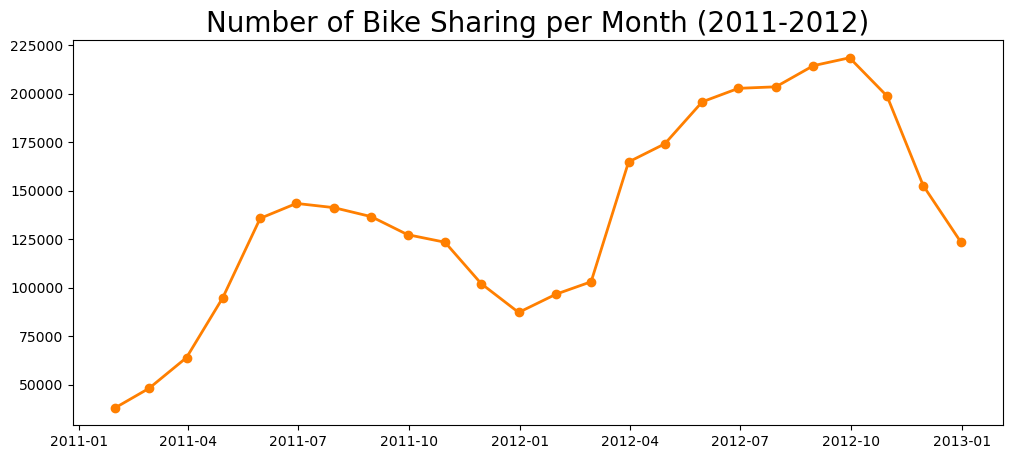

In [120]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
 
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "cnt": "monthly_cnt"
}, inplace=True)
 
plt.figure(figsize=(12, 5)) 
plt.plot(monthly_df["dteday"], monthly_df["monthly_cnt"], marker='o', linewidth=2, color="#FF7F00") 
plt.title("Number of Bike Sharing per Month (2011-2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2: Musim apa yang memiliki jumlah penyewaan sepeda tertinggi dan terendah?

Membuat bar chart terkait jumlah penyewaan sepeda berdasarkan season

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6444\3832386259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


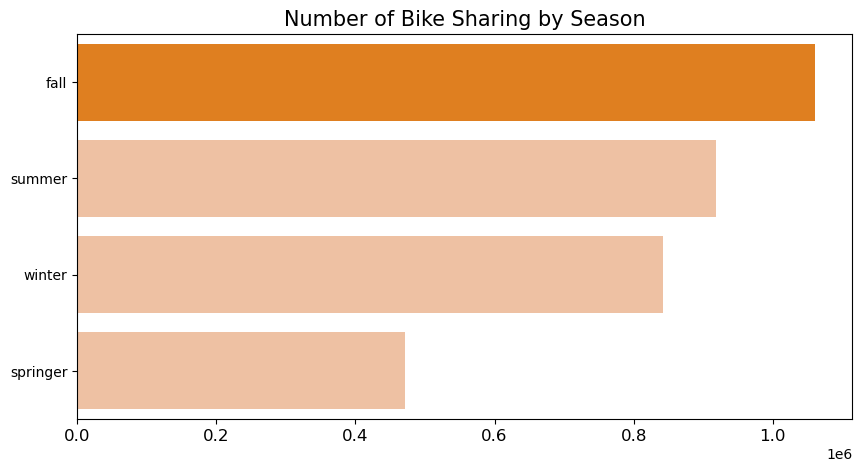

In [118]:
season_df = day_df.groupby(by="season").cnt.sum().reset_index()
season_df.rename(columns={
    "cnt": "total_rent"
}, inplace=True)
season_df
plt.figure(figsize=(10, 5))

colors = ["#FF7F00", "#FABE97", "#FABE97", "#FABE97"]

sns.barplot(
    x="total_rent", 
    y="season",
    data=season_df.sort_values(by="total_rent", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

Membuat bar chart terkait jumlah penyewaan sepeda berdasarkan suhu

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6444\1464815590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


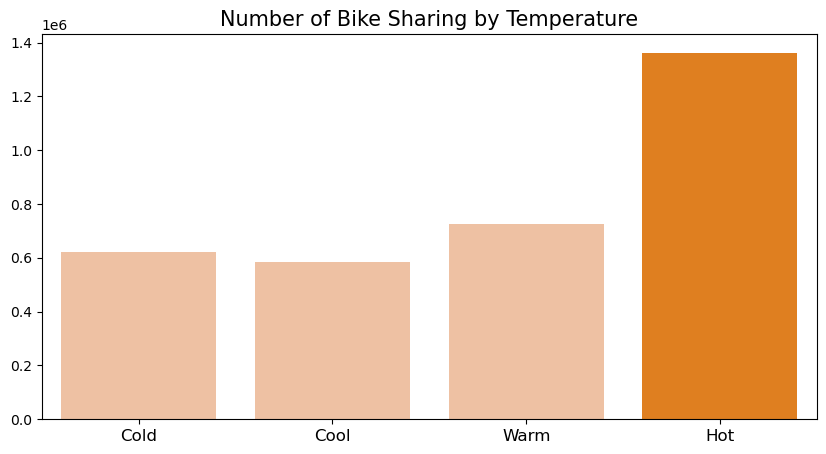

In [83]:
bytemp_df = day_df.groupby(by="temp_group").cnt.sum().reset_index()
bytemp_df.rename(columns={
    "cnt": "total_cnt"
}, inplace=True)
bytemp_df
bytemp_df['temp_group'] = pd.Categorical(bytemp_df['temp_group'], ["Cold", "Cool", "Warm", "Hot"])
plt.figure(figsize=(10, 5))
colors_ = ["#FABE97", "#FABE97", "#FABE97", "#FF7F00"]
 
sns.barplot(
    y="total_cnt", 
    x="temp_group",
    data=bytemp_df.sort_values(by="temp_group", ascending=False),
    palette=colors_
)
plt.title("Number of Bike Sharing by Temperature", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana perbandingan jumlah penyewa sepeda antara hari kerja dengan hari libur?

Membuat bar chart terkait jumlah penyewaan sepeda berdasarkan tipe hari

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6444\482671159.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


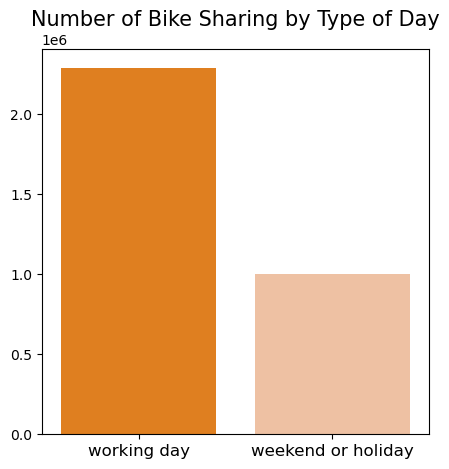

In [95]:
workingday_df = day_df.groupby(by="workingday").cnt.sum().reset_index()
workingday_df.rename(columns={
    "cnt": "total_rent"
}, inplace=True)
 
plt.figure(figsize=(5, 5))

colors = ["#FF7F00", "#FABE97"]

sns.barplot(
    y="total_rent", 
    x="workingday",
    data=workingday_df.sort_values(by="total_rent", ascending=False),
    palette=colors
)
plt.title("Number of Bike Sharing by Type of Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Jumlah penyewaan sepeda terbanyak terjadi pada bulan September tahun 2012
- Jumlah penyewaan sepeda terbanyak terjadi pada musim gugur
- Jumlah penyewaan sepeda terbanyak terjadi ketika suhu lebih dari 25 derajat celsius (hot)
- Jumlah penyewaan sepeda terbanyak terjadi pada working day

## Conclusion

- Jumlah penyewaan sepeda rata-rata mengalami kenaikan pada awal tahun sampai kuartal ke- 3
- Jumlah penyewaan sepeda terbanyak terjadi pada musim gugur, diikuti dengan musim panas, dingin, dan semi
- Jumlah penyewaan sepeda terbanyak terjadi ketika suhu mencapai lebih dari 25 derajat celsius (hot)
- Jumlah penyewaan sepeda terbanayk terjadi pada working day. Kemungkinan hal ini disebabkan karena pengguna menyewa sepeda untuk melakukan kegiatan seperti bekerja

In [126]:
day_df.to_csv("all_data.csv", index=False)